# Perform the data clustering algorithm using any Clustering algorithm 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
# 1) Load the data
df = pd.read_csv("Mall_Customers.csv")

# 2) Select features for clustering
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows wi

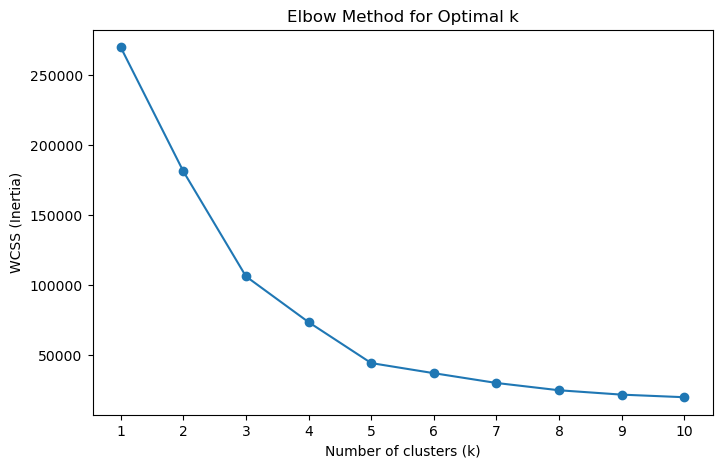

In [3]:
# 3) Elbow Method to find optimal k
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, init="k-means++", random_state=42, n_init=10)
    km.fit(X)
    wcss.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker="o")
plt.title("Elbow Method for Optimal k")
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.xticks(range(1, 11))
plt.show()

In [4]:
# 4) Apply K-Means with chosen k (e.g. 5)
k_opt = 5
kmeans = KMeans(n_clusters=k_opt, init="k-means++", random_state=42, n_init=10)
clusters = kmeans.fit_predict(X)

# 5) Visualize clusters
plt.figure(figsize=(10, 6))

C:\Users\DELL\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

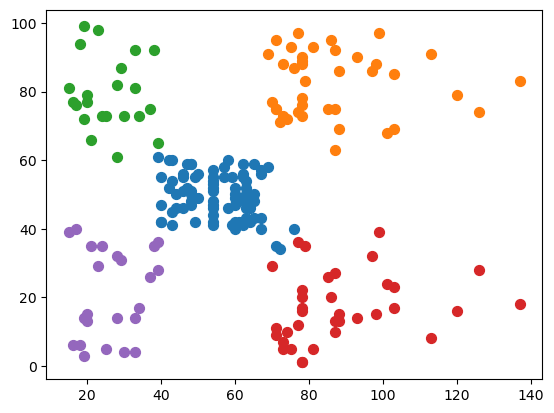

In [5]:
# scatter by cluster
for i in range(k_opt):
    plt.scatter(
        X.values[clusters == i, 0], 
        X.values[clusters == i, 1],
        s=50, label=f"Cluster {i+1}"
    )

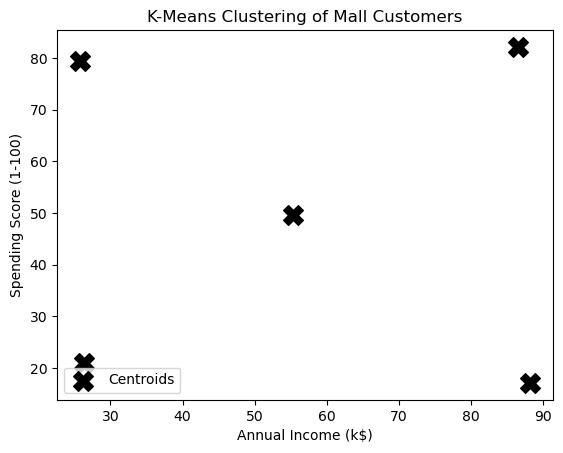

In [6]:
# plot centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0],
    kmeans.cluster_centers_[:, 1],
    s=200, c="black", marker="X", label="Centroids"
)

plt.title("K-Means Clustering of Mall Customers")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()